# Coding Heat Equation in 2D

### All of the boundary conditions are set to zero, and then the initial condition for the interior grid is randomized.

<IPython.core.display.Javascript object>


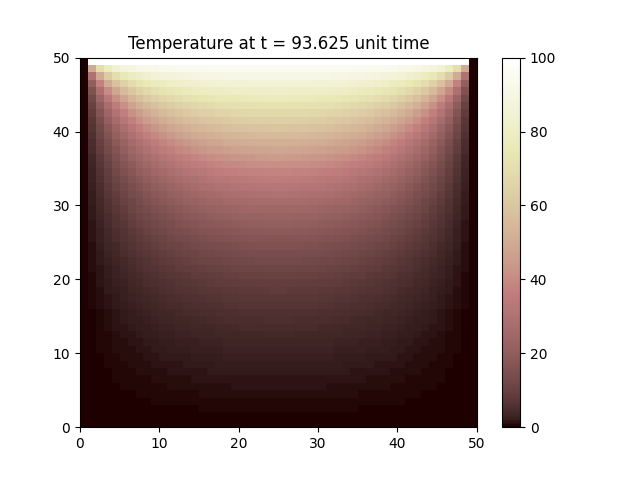

MovieWriter ffmpeg unavailable; using Pillow instead.


Done! :D


In [15]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


L = 50
t = 750

c = 2
dx = 1

dt = (delta_x ** 2)/(4 * c)
gamma = (c * dt) / (dx ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((t, L, L))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (L-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (L-1):] = u_right

def calculate(u):
    for k in range(0, t-1, 1):
        for i in range(1, L-1, dx):
            for j in range(1, L-1, dx):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear figure
    plt.clf()

    plt.title(f"Temperature at t = {k*dt:.3f} unit time")


    
    plt.pcolormesh(u_k, cmap=plt.cm.pink, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=t, repeat=False)
anim.save("2dheat_equation_solution.gif")

print("Done! :D")